# Project: European Soccer Database Analysis

By: Egwuda Ojonugwa Everest

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#Reference links">Reference Links</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, We will analyze data of 11 European Professsional leagues from seasons 2008 - 2016.

## The Dataset Includes;
1. +10,000 Professional players
2. +25,000 Matches
3. 11 European Countries with their lead championship
4. Seasons 2008 - 2016
5. Players and Teams' attributes* sourced from EA Sports FIFA video game series, including the weekly updates
6. Match events(Season, League, Home Team goals, Away Team goals)for +10,000 Matches


## Research Questions for Analysis
1. Which teams improved the most over a period of time?
2. Which player had the most Penalties?

In [40]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')
sns.set_palette('Set2')
from matplotlib.cbook import boxplot_stats
import sqlite3

<a id='wrangling'></a>
## Data Wrangling




### Import the Dataset

In [41]:
con = sqlite3.connect('C:/Users/user/Downloads/database.sqlite')
cur = con.cursor()

print('Uploaded')

Uploaded


Inspecting the original database on Kaggle, we learn that the database has Seven data tables and we need to collect columns from each using SQL queries.

In [42]:
def sql_read(a,b):
    print(a)
    print(b.head())
    print(b.shape)
    print('\n')
    
country = pd.read_sql('select * from country', con)
sql_read('country', country)
league = pd.read_sql('select * from league', con)
sql_read('league', league)
match = pd.read_sql('select * from match', con)
sql_read('match', match)
player = pd.read_sql('select * from player', con)
sql_read('player', player)
player_attributes = pd.read_sql('select * from player_attributes', con)
sql_read('player_attributes', player_attributes)
team = pd.read_sql('select * from team', con)
sql_read('team', team)
team_attributes = pd.read_sql('select * from team_attributes', con)
sql_read('team_attributes', team_attributes)

country
      id     name
0      1  Belgium
1   1729  England
2   4769   France
3   7809  Germany
4  10257    Italy
(11, 2)


league
      id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A
(11, 3)


match
   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1 

In [45]:
# get the tables from the data

pd.read_sql('select * from sqlite_sequence', con)

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


In [46]:
team = pd.read_sql('select * from team', con)

team.tail()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU
298,51606,7896,NaN,Lugano,LUG


In [47]:
# check the shape

team.shape

(299, 5)

Team table contains 299 rows and 5 columns

In [48]:
# check the team info
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [49]:
# check for missing values

team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

team_fifa_api_id in the Team table has missing values

In [50]:
# get the 11 European countries in the dataset
country = pd.read_sql('select * from country', con)

country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


The 11 European countries from which we will analyse their lead championship, these countries have the top leagues in Europe according to UEFA rankings

In [51]:
# check the shape
country.shape

(11, 2)

country table contains 11 rows and 2 columns

In [52]:
# check the info

country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [53]:
# Check for missing values

country.isnull().sum()

id      0
name    0
dtype: int64

country table has no missing value

In [54]:
# get the Professional leagues of the countries
league = pd.read_sql('select * from league', con)

league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [55]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


league table contains 11 rows and 3 columns

In [56]:
# Check for null values

league.isnull().sum()

id            0
country_id    0
name          0
dtype: int64

league table has no missing value

In [57]:
match = pd.read_sql('select * from match', con)

match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [58]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


match table contains 25979 rows and 115 columns

In [59]:
# Check for missing values

match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [60]:
# get the player table

# player = pd.read_sql('select * from player', con)

player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [61]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


Players table contains 11060 rows and 7 columns

In [62]:
# Check for missing values

player.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

Players tables has no missing value

In [63]:
player_attributes = pd.read_sql('select * from player_attributes', con)

player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


the data above is the player attributes table from the 11 European countries containing their ratings, potential and overall features over seasons.

In [64]:
# check for missing values

player_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

Player attributes table has missing values

In [65]:
# player attributes ie. peculiarity of every player in this 11 European league 
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

Player attributes tables contains 183978 rows and 42 columns

In [66]:
# Team attributes ie, features and playing pattern of the teams in this 11 European leagues
team_attributes = pd.read_sql('select * from team_attributes', con)

team_attributes.tail()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1457,1458,15005,10000,2015-09-10 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [67]:
team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

Team attributes table contains 1458 rows and 25 columns

In [68]:
# check for missing values

team_attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

Team attributes table contain missing values

In [69]:
# Convert the tables to Dataframe
country = pd.DataFrame(country)
team = pd.DataFrame(team)
match = pd.DataFrame(team)
player = pd.DataFrame(player)
league = pd.DataFrame(league)
player_attributes = pd.DataFrame(player_attributes)
team_attributes = pd.DataFrame(team_attributes)

In [70]:
# Merge the Team table with Match table

table = pd.read_sql("""SELECT * FROM team 
            LEFT JOIN match
            on team.team_api_id = match.home_team_api_id""", con)

table.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,country_id,league_id,season,stage,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,9987,673.0,KRC Genk,GEN,1,1,1,2008/2009,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.4,4.2
1,1,9987,673.0,KRC Genk,GEN,200,1,1,2008/2009,3,...,5.00,1.60,3.40,5.00,1.65,3.40,4.60,1.67,3.4,4.5
2,1,9987,673.0,KRC Genk,GEN,263,1,1,2008/2009,5,...,2.63,2.50,3.25,2.50,2.50,3.20,2.50,2.40,3.2,2.6
3,1,9987,673.0,KRC Genk,GEN,281,1,1,2008/2009,7,...,7.50,1.40,4.00,7.00,1.45,4.00,6.50,1.50,3.6,6.5
4,1,9987,673.0,KRC Genk,GEN,299,1,1,2008/2009,9,...,2.40,2.75,3.25,2.25,2.60,3.25,2.45,2.75,3.2,2.3


# Exploratory Data Analysis

We will collect features necessary for analysis from the database, store it in a dataframe and then merge it into a single dataframe

In [71]:
# Collect match datatable that includes only Matches results for the Home Team

hometeam_data = """SELECT C.name AS 'country',
                                L.name AS 'league', 
                                HT.team_long_name AS 'team', 
                                M.season AS 'season', 
                                M.home_team_goal AS 'goals_for', 
                                M.away_team_goal AS 'goals_against' 
                         FROM Country AS C, League AS L, Match AS M, Team AS HT 
                         ON C.id = L.country_id 
                         AND L.id = M.league_id 
                         AND HT.team_api_id = M.home_team_api_id 
                         ORDER BY country, league, team, season;"""
df_hometeam = pd.read_sql(hometeam_data, con)

In [72]:
# Collect match datatable that includes only Matches results for the Away Team

awayteam_data = """SELECT C.name AS 'country', 
                                L.name AS 'league', 
                                HT.team_long_name AS 'team', 
                                M.season AS 'season', 
                                M.away_team_goal AS 'goals_for', 
                                M.home_team_goal AS 'goals_against' 
                         FROM Country AS C, League AS L, Match AS M, Team AS HT 
                         ON C.id = L.country_id 
                         AND L.id = M.league_id 
                         AND HT.team_api_id = M.away_team_api_id 
                         ORDER BY country, league, team, season;"""
df_awayteam = pd.read_sql(awayteam_data, con)

In [73]:
# Merge Home team and Away team tables

df_match = pd.concat([df_hometeam, df_awayteam], ignore_index=True)

df_match.head()

,country,league,team,season,goals_for,goals_against
0,Belgium,Belgium Jupiler League,Beerschot AC,2008/2009,1,3
1,Belgium,Belgium Jupiler League,Beerschot AC,2008/2009,1,3
2,Belgium,Belgium Jupiler League,Beerschot AC,2008/2009,0,2
3,Belgium,Belgium Jupiler League,Beerschot AC,2008/2009,3,0
4,Belgium,Belgium Jupiler League,Beerschot AC,2008/2009,2,0


In [74]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51958 entries, 0 to 51957
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        51958 non-null  object
 1   league         51958 non-null  object
 2   team           51958 non-null  object
 3   season         51958 non-null  object
 4   goals_for      51958 non-null  int64 
 5   goals_against  51958 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [75]:
# Generate new features: Matches, won, draw, goal difference, lost, goals for, goals against

df_match['played'] = np.repeat(1, len(df_match), axis=0)

In [76]:
df_match['won'] = (df_match['goals_for'].gt(df_match['goals_against'])).mul(1)
df_match['drawn'] = (df_match['goals_for'].eq(df_match['goals_against'])).mul(1)
df_match['lost'] = (df_match['goals_for'].lt(df_match['goals_against'])).mul(1)

In [77]:
df_match['goal_difference'] = df_match['goals_for'].subtract(df_match['goals_against'])

In [78]:
df_match['points'] = (df_match['won'].mul(3)).add(df_match['drawn'])

In [79]:
# Re-arrange the Dataframe Columns
df_match = df_match.reindex(columns=['country', 
                                     'league', 
                                     'team', 
                                     'season', 
                                     'played', 
                                     'won', 
                                     'drawn', 
                                     'lost', 
                                     'goals_for', 
                                     'goals_against', 
                                     'goal_difference', 
                                     'points'])

In [80]:
df_match = df_match.groupby(['country', 'league', 'team', 'season']).sum().reset_index()

df_match.head()

,country,league,team,season,played,won,drawn,lost,goals_for,goals_against,goal_difference,points
0,Belgium,Belgium Jupiler League,Beerschot AC,2008/2009,34,11,9,14,44,42,2,42
1,Belgium,Belgium Jupiler League,Beerschot AC,2009/2010,28,9,8,11,30,43,-13,35
2,Belgium,Belgium Jupiler League,Beerschot AC,2010/2011,30,5,11,14,24,40,-16,26
3,Belgium,Belgium Jupiler League,Beerschot AC,2011/2012,30,9,9,12,45,51,-6,36
4,Belgium,Belgium Jupiler League,Beerschot AC,2012/2013,30,6,5,19,31,61,-30,23


In [81]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          1478 non-null   object
 1   league           1478 non-null   object
 2   team             1478 non-null   object
 3   season           1478 non-null   object
 4   played           1478 non-null   int32 
 5   won              1478 non-null   int32 
 6   drawn            1478 non-null   int32 
 7   lost             1478 non-null   int32 
 8   goals_for        1478 non-null   int64 
 9   goals_against    1478 non-null   int64 
 10  goal_difference  1478 non-null   int64 
 11  points           1478 non-null   int32 
dtypes: int32(5), int64(3), object(4)
memory usage: 109.8+ KB


In [82]:
df_match.nunique()

country             11
league              11
team               296
season               8
played              10
won                 33
drawn               21
lost                31
goals_for           94
goals_against       78
goal_difference    131
points              87
dtype: int64

In [83]:
penalties = """SELECT P.player_name, PA.date, PA.penalties 
                          FROM Player AS P, Player_Attributes AS PA 
                          ON P.player_api_id = PA.player_api_id 
                          ORDER BY penalties DESC;"""
df_penalties = pd.read_sql(penalties, con) 

In [84]:
df_penalties.head()

,player_name,date,penalties
0,Rickie Lambert,2016-03-10 00:00:00,96.0
1,Rickie Lambert,2015-12-24 00:00:00,96.0
2,Rickie Lambert,2015-10-23 00:00:00,96.0
3,Rickie Lambert,2015-09-21 00:00:00,96.0
4,Andrea Pirlo,2009-02-22 00:00:00,95.0


In [85]:
df_penalties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   player_name  183978 non-null  object 
 1   date         183978 non-null  object 
 2   penalties    183142 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.2+ MB


In [86]:
# Check for null values
df_penalties.isnull().sum()

player_name      0
date             0
penalties      836
dtype: int64

In [87]:
df_penalties.nunique()

player_name    10848
date             197
penalties         94
dtype: int64

In [88]:
# drop null values 
df_penalties.dropna(inplace=True)

In [89]:
df_penalties.isnull().sum()

player_name    0
date           0
penalties      0
dtype: int64

In [90]:
# Convert Penalty column to Integer

df_penalties['penalties'] = pd.to_numeric(df_penalties['penalties'], downcast='integer')

In [91]:
# Convert the date column into datetime without hours runtime
df_penalties['date'] = pd.to_datetime(df_penalties['date']).dt.date

In [92]:
df_penalties.head()

,player_name,date,penalties
0,Rickie Lambert,2016-03-10,96
1,Rickie Lambert,2015-12-24,96
2,Rickie Lambert,2015-10-23,96
3,Rickie Lambert,2015-09-21,96
4,Andrea Pirlo,2009-02-22,95


In [93]:
df_penalties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183141
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   player_name  183142 non-null  object
 1   date         183142 non-null  object
 2   penalties    183142 non-null  int8  
dtypes: int8(1), object(2)
memory usage: 4.4+ MB


In [94]:
# Max penalties record per player
max_df_penalties = df_penalties.groupby(['player_name'], as_index=False)['penalties'].max()

In [95]:
max_df_penalties = max_df_penalties.merge(df_penalties, how='left', on=['player_name', 'penalties']
                                         ).groupby(['player_name', 'penalties'], as_index=False)['date'].max()

In [96]:
max_df_penalties.sort_values('penalties', ascending=False, ignore_index=True, inplace=True)

In [97]:
max_df_penalties.head()

,player_name,penalties,date
0,Rickie Lambert,96,2016-03-10
1,Andrea Pirlo,95,2009-02-22
2,Xavi Hernandez,95,2010-02-22
3,Mario Balotelli,95,2014-01-24
4,Paul Scholes,95,2010-02-22


In [98]:
max_df_penalties.describe()

,penalties
count,10848.000000
mean,60.392054
std,14.657931
min,9.000000
25%,51.000000
50%,62.000000
75%,71.000000
max,96.000000


In [99]:
max_df_penalties

,player_name,penalties,date
0,Rickie Lambert,96,2016-03-10
1,Andrea Pirlo,95,2009-02-22
2,Xavi Hernandez,95,2010-02-22
3,Mario Balotelli,95,2014-01-24
4,Paul Scholes,95,2010-02-22
...,...,...,...
10843,Igor Stefanovic,11,2016-01-14
10844,Giedrius Arlauskis,11,2016-02-04
10845,Jakub Szumski,11,2016-03-10
10846,Timothy van der Meulen,10,2011-02-22


### Research Question 1  (Which teams improved the most over a period of time?)

In [106]:
# Teams with the highest point difference
pts_range_df = df_match.groupby(['country', 'league', 'team']
                               ).agg({'points': np.ptp}).reset_index().rename(columns = {'points':'points_diff'})

In [107]:
# Maximum range per league
max_range_df = pts_range_df.groupby(['country', 'league']).max(numeric_only=True).reset_index()

In [108]:
teams_max_range_df = pd.merge(max_range_df, pts_range_df, on=['country', 'league', 'points_diff']
                             ).reindex(columns = ['country', 'league', 'team', 'points_diff'])

In [109]:
teams_min_max_df = teams_max_range_df[['country', 'league', 'team']
                                     ].merge(df_match, how='inner', on=['country', 'league', 'team']
                                            ).groupby(['country', 'league', 'team'])['points'].agg(['min','max']
                                                                                                  ).reset_index()

In [110]:
teams_min_df = teams_min_max_df.merge(df_match, 
                                      how='inner', 
                                      left_on=['country', 'league', 'team', 'min'], 
                                      right_on=['country', 'league', 'team', 'points'])

teams_max_df = teams_min_max_df.merge(df_match, 
                                      how='inner', 
                                      left_on=['country', 'league', 'team', 'max'], 
                                      right_on=['country', 'league', 'team', 'points'])


In [111]:
teams_highest_df = pd.concat([teams_min_df, teams_max_df], ignore_index=True
                            ).groupby(['country', 'league', 'team', 'season']
                                     ).sum().reset_index().reindex(columns=df_match.columns)

In [112]:
teams_highest_df.head()

,country,league,team,season,played,won,drawn,lost,goals_for,goals_against,goal_difference,points
0,Belgium,Belgium Jupiler League,KAA Gent,2013/2014,6,3,1,2,11,6,5,10
1,Belgium,Belgium Jupiler League,KAA Gent,2015/2016,30,17,9,4,56,29,27,60
2,England,England Premier League,Aston Villa,2009/2010,38,17,13,8,52,39,13,64
3,England,England Premier League,Aston Villa,2015/2016,38,3,8,27,27,76,-49,17
4,France,France Ligue 1,Paris Saint-Germain,2009/2010,38,12,11,15,50,46,4,47


In [113]:
pd.options.mode.chained_assignment = None

teams_prop_df = teams_highest_df[['country', 'league', 'team', 'season', 'played']]
teams_prop_df['won_prop'] = teams_highest_df['won'].div(teams_highest_df['played'])
teams_prop_df['drawn_prop'] = teams_highest_df['drawn'].div(teams_highest_df['played'])
teams_prop_df['lost_prop'] = teams_highest_df['lost'].div(teams_highest_df['played'])
teams_prop_df['points_prop'] = teams_highest_df['points'].div((teams_highest_df['played'].mul(3)))

In [114]:
teams_prop_df.head()

,country,league,team,season,played,won_prop,drawn_prop,lost_prop,points_prop
0,Belgium,Belgium Jupiler League,KAA Gent,2013/2014,6,0.500000,0.166667,0.333333,0.555556
1,Belgium,Belgium Jupiler League,KAA Gent,2015/2016,30,0.566667,0.300000,0.133333,0.666667
2,England,England Premier League,Aston Villa,2009/2010,38,0.447368,0.342105,0.210526,0.561404
3,England,England Premier League,Aston Villa,2015/2016,38,0.078947,0.210526,0.710526,0.149123
4,France,France Ligue 1,Paris Saint-Germain,2009/2010,38,0.315789,0.289474,0.394737,0.412281


In [115]:
def team_performance_plot(team_index):
    """Plot the team performance"""
    
    # Gather only data that'll be plotted
    values_df = teams_prop_df[['won_prop', 'drawn_prop', 'lost_prop', 'points_prop']]
    
    # Create a list of the bar labels
    bar_labels = ['WON%', 'DRAWN%', 'LOST%', 'POINTS%']
    
    # Create leagend labels
    legend_df = teams_prop_df['country'].str.cat([teams_prop_df['team'], 
                                                  teams_prop_df['season'], 
                                                  teams_prop_df['played'].astype('string')], sep=" | ")
    
    ind = np.arange(4)  # the x locations for the groups
    width = 0.35       # the width of the bars
    
    # figure size
    plt.figure(figsize=(11,7))
    
    # plot bars
    white_bars = plt.bar(ind, values_df.iloc[team_index*2 - 2], width, color='cornsilk', alpha=.7, 
                         label="{} Matches".format(legend_df.iloc[team_index*2 - 2]))
    green_bars = plt.bar(ind + width, values_df.iloc[team_index*2 - 1], width, color='seagreen', alpha=.7, 
                         label="{} Matches".format(legend_df.iloc[team_index*2 - 1]))

    # title and labels
    plt.ylabel('Achievement Proportion', fontdict={"fontsize":15})
    plt.xlabel('Team Stats', fontdict={"fontsize":15})
    plt.title('Proportion by Total Played Matches and Team Performance', fontdict={"fontsize":20}, x=0.5, y=1.01)
    locations = ind + width / 2  # xtick locations
    labels = bar_labels # xtick labels
    plt.xticks(locations, labels)
    
    # legend
    plt.legend(fancybox=True, framealpha=0.7, edgecolor="black", bbox_to_anchor=(1,1), loc="upper left");

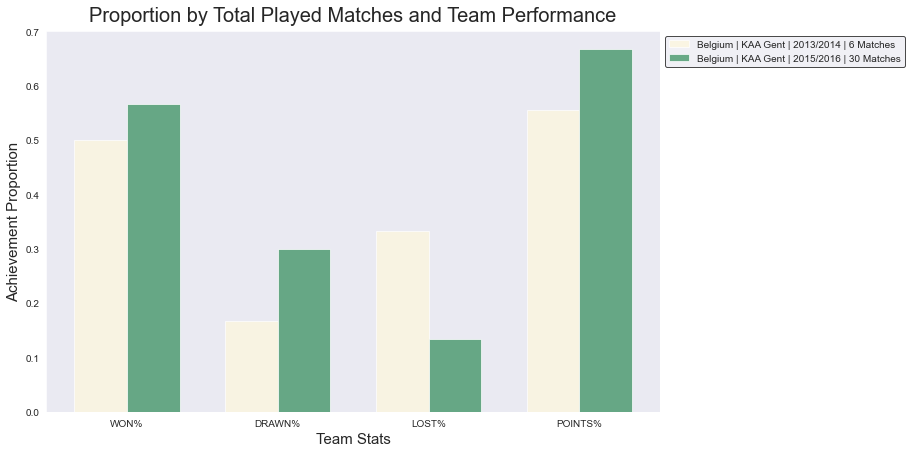

In [116]:
team_performance_plot(1) #Gent Belgium

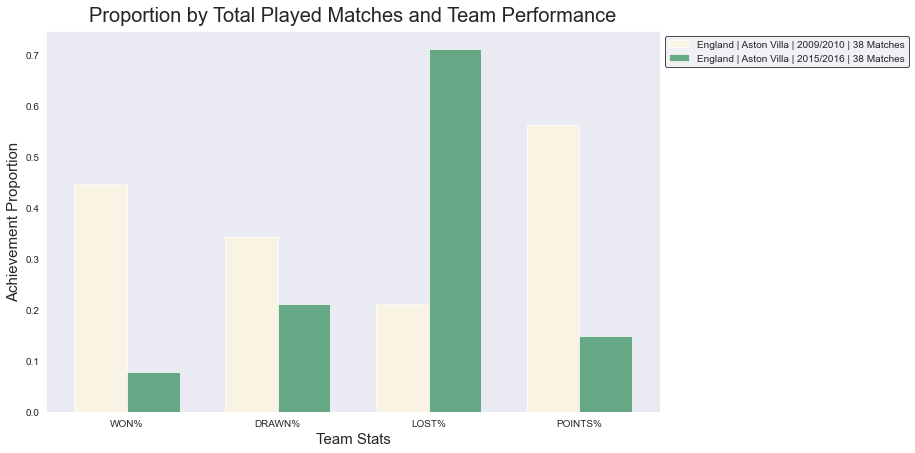

In [117]:
team_performance_plot(2) #Aston villa England

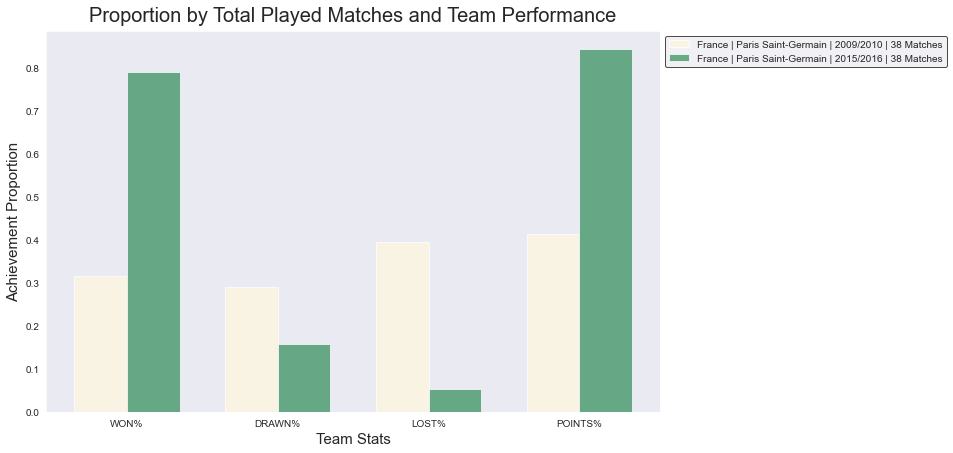

In [118]:
team_performance_plot(3) #PSG France

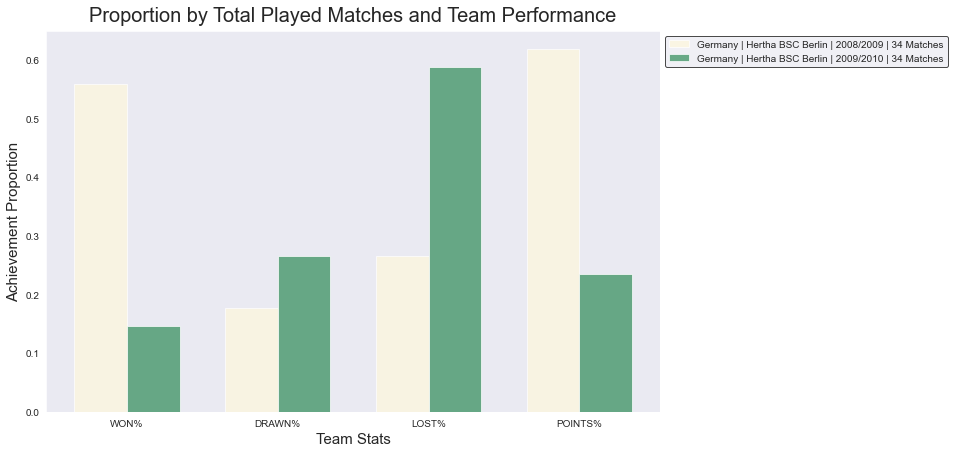

In [119]:
team_performance_plot(4) # Hertha Berlin Germany

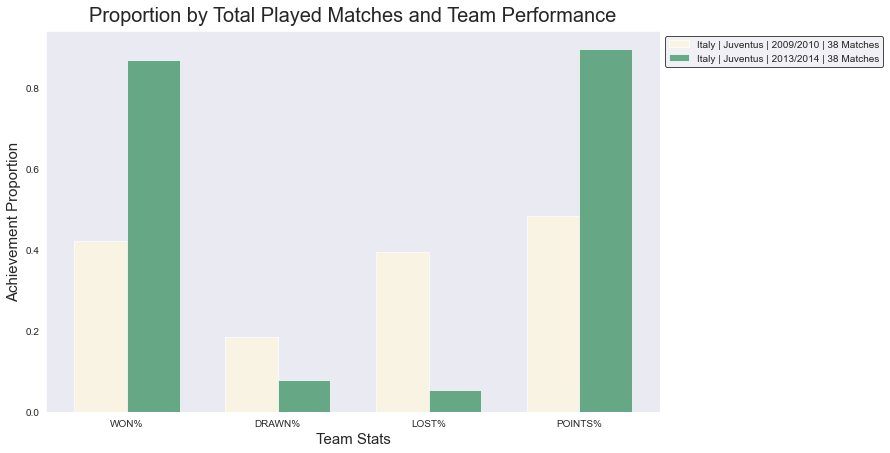

In [120]:
team_performance_plot(5) # Juventus Italy

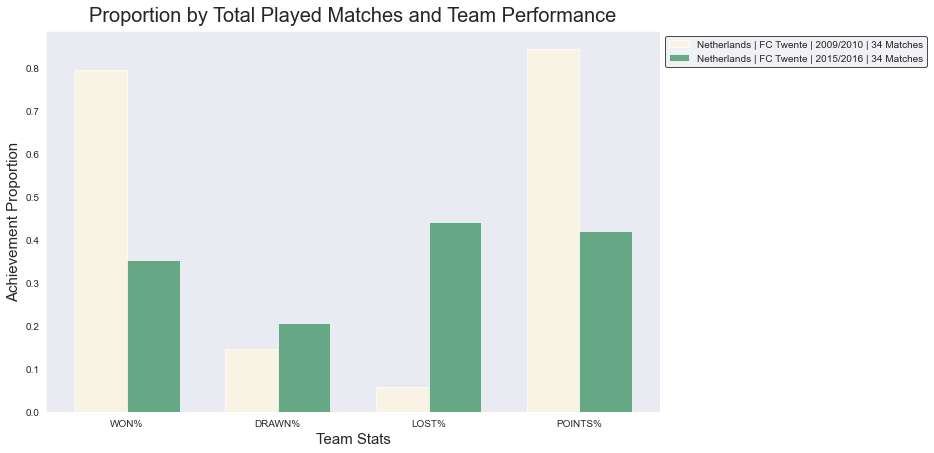

In [121]:
team_performance_plot(6) # Twnete Netherlands

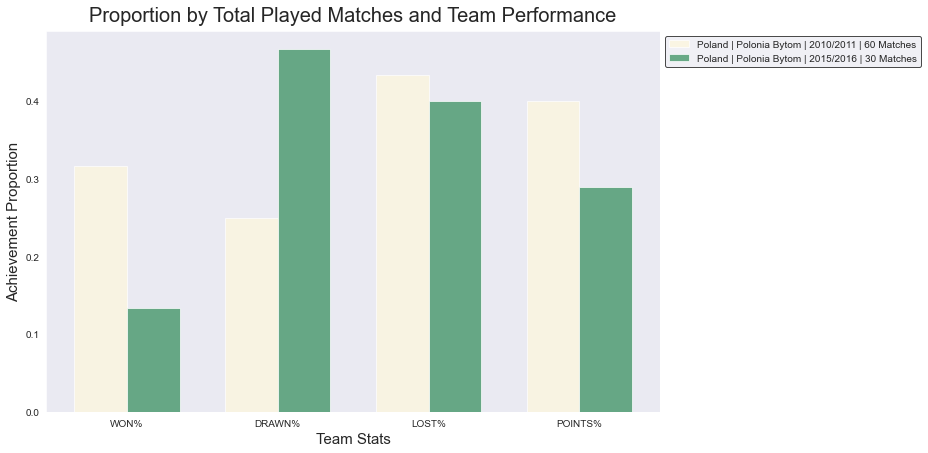

In [122]:
team_performance_plot(7) # Polonia Bytom Poland

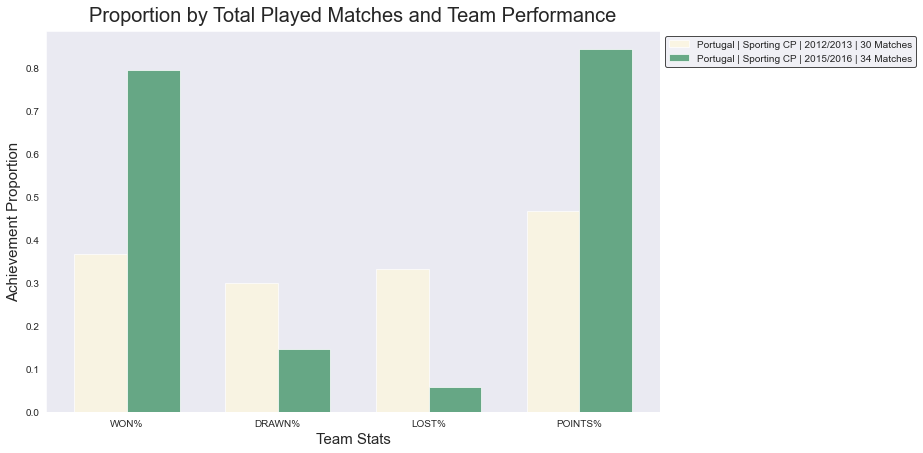

In [123]:
team_performance_plot(8) # Sporting CP Portugal

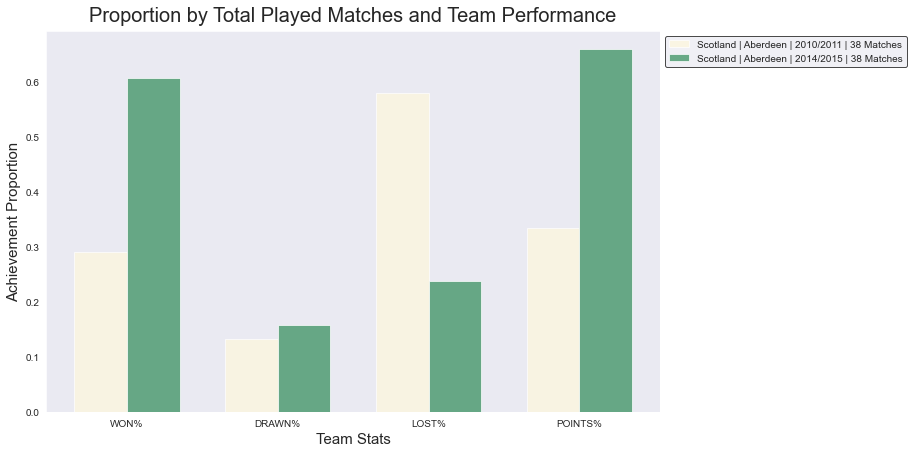

In [124]:
team_performance_plot(9) # Aberdeen Scotland

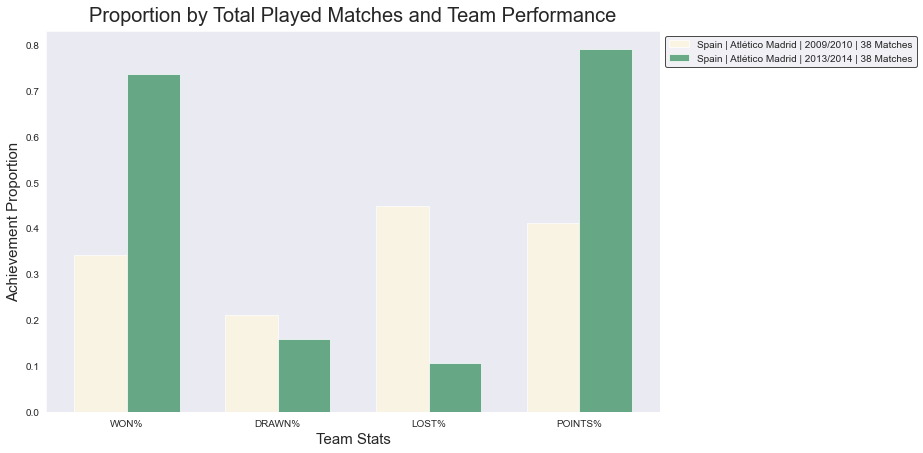

In [125]:
team_performance_plot(10) # Atletico Madrid Spain

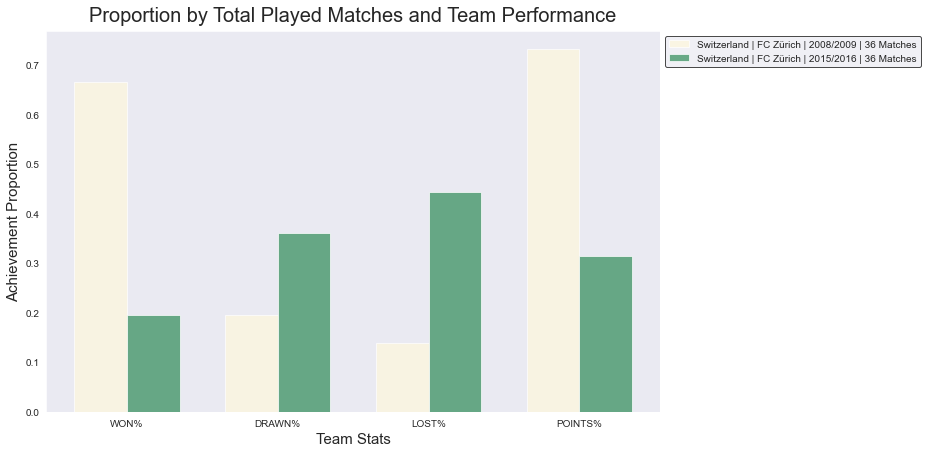

In [126]:
team_performance_plot(11) # FC Zurich Switzerland

### Research Question 2  (Which player had the most Penalties?)

We worked on the Penalties table earlier;

In [127]:
# Load the table
max_df_penalties

,player_name,penalties,date
0,Rickie Lambert,96,2016-03-10
1,Andrea Pirlo,95,2009-02-22
2,Xavi Hernandez,95,2010-02-22
3,Mario Balotelli,95,2014-01-24
4,Paul Scholes,95,2010-02-22
...,...,...,...
10843,Igor Stefanovic,11,2016-01-14
10844,Giedrius Arlauskis,11,2016-02-04
10845,Jakub Szumski,11,2016-03-10
10846,Timothy van der Meulen,10,2011-02-22


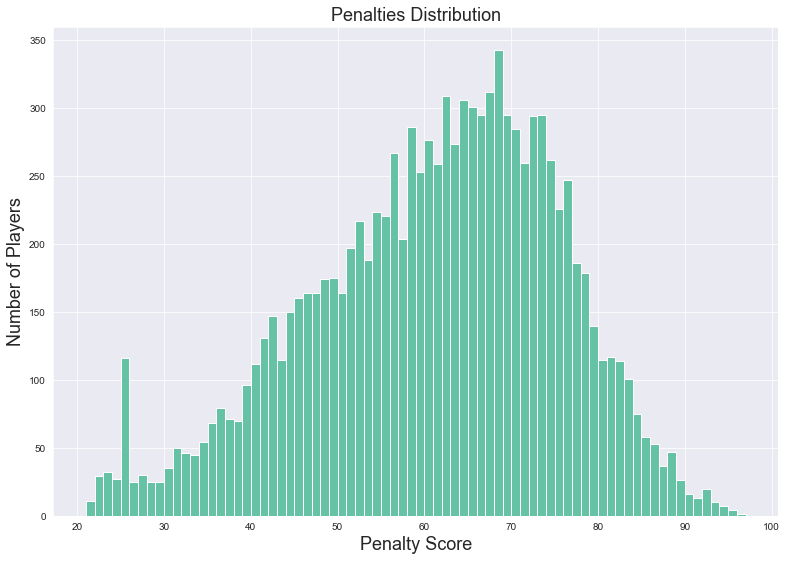

In [128]:
# Penalties frequency distribution using Histogram
max_df_penalties.hist('penalties', bins=range(21, 98), figsize=(13,9))
plt.xlabel('Penalty Score', fontsize=18)
plt.ylabel('Number of Players', fontsize=18)
plt.title('Penalties Distribution', fontsize=18);

From the Histogram, we can deduce that the most common penalty score is 68 penalties, almost 350 players had 68 penalties, also only 1 player had a penalty score of 96

In [129]:
max_df_penalties.penalties.value_counts()#.sort_values()

68    343
67    312
62    309
64    306
65    301
     ... 
12      2
10      1
17      1
9       1
96      1
Name: penalties, Length: 88, dtype: int64

In [130]:
max_df_penalties.penalties.value_counts().sort_index(ascending=False)[:5]#.sum()

96     1
95     4
94     7
93    10
92    20
Name: penalties, dtype: int64

Text(0.5, 1.0, 'Penalty Score')

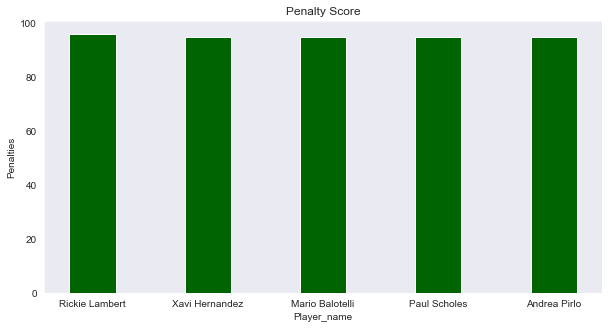

In [131]:
fig = plt.figure(figsize = (10 , 5))
penalties_plt = max_df_penalties.sort_values('penalties', axis = 0, ascending = False).head()

plt.bar(penalties_plt['player_name'], penalties_plt['penalties'], color = 'Darkgreen', width = 0.4)
plt.xlabel('Player_name')
plt.ylabel('Penalties')
plt.title('Penalty Score')

The bar graph shows the top 5 players with high penalty score with Rickie Lambert being No 1 having scored 96 penalties

In [132]:
# Player with the most penalties
max_df_penalties.loc[max_df_penalties['penalties'].idxmax()]

player_name    Rickie Lambert
penalties                  96
date               2016-03-10
Name: 0, dtype: object

<a id='conclusions'></a>
## Conclusions

>  1. It is observed from the analysis done that teams like Paris Saint Germain, Juventus, Aberdeen, Atletico Madrid, Sporting CP and KAA Gent improved their performance over seasons.

> 2. Hertha Berlin, Polonia Bytom, Aston Villa, FC Twente and FC Zurich had Poor performances over seasons and their levels fell.

> 3. There's just one player with the highest penalty score; Rickie Lambert 96. and the most common penalty score is 68 penalties with 343 players having that score.

> 4. Using Domain Knowledge, we can deduce from this analysis that the top 5 players with high penalty score play their football in England and Spain.

> 5. The distribution of penalty score is a normal distribution.



## Limitations : There are a couple of Limitations with our data:

> 1. There are null values in the Team, Player_Attributes and Team_Attributes tables and the author of the dataset stated that there are missing players and missing player attributes because he was not able to source the data from FIFA.

> 2. The Data is not exactly peculiar with which team a player belongs to.



## Reference Links

1. Stackoverflow - https://stackoverflow.com/questions/41256648/select-multiple-ranges-of-columns-in-pandas-dataframe

2. Github http://Github.com